In [1]:
# Import some stuff
import numpy as np 
from scipy.special import erf
import numpy.random as rn
import matplotlib
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
%matplotlib inline  

# Problem  1

The probability of getting $k$ correlated to an astrophysical source neutrinos, $v$, that come from an isotropic distribution, after performing $n$ measurements is given by the Binomial distribution:

\begin{equation}
\boxed{
\mbox{Pr}(k;n,p) = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}}
\end{equation}

where $p$ the probability that a detected $v$ (from an isotropic distribution) is correlated to an astrophysical source. This is given to be: $p = 0.30$.

- Let's first calculate the probability that out of 15 (isotropically distributed) $v$ 10 are correlated to astrophysical sources. This is :

\begin{equation}
\mbox{Pr}(10;15) = \frac{15\!}{10!(15-10)\!} 0.3^{10}(1-0.3)^{15-10} = \frac{15!}{10!5!}0.3^{10}0.7^{5}
\end{equation}

Now: 
\begin{equation}\frac{15!}{10!5!} = \frac{10!11 \times 12 \times 13 \times 14 \times 15}{10! 2 \times 3 \times 4 \times 5} = \frac{360360}{120} = 3003
\end{equation}
, so:

\begin{equation}
\mbox{Pr}(10;15) = 3003\times(5.9 \times 10^{-6})\times 0.168 \cong 2.97 \times 10^{-3}
\end{equation} 

So, the probability to  have 10 out of the 15 neutrinos correlated to astrophysical sources (if they come from an isotropic distribution) is : $\mbox{Pr}(10;15) \cong 0.00297$


Similarly, we can calculate the probability an isotropic distribution to result in stronger correlation, i.e. the probablity : $\mbox{Pr}(11;15)$. Working as above, we get:

\begin{equation}
\boxed{
\mbox{Pr}(11;15) \cong 0.000576}
\end{equation}

($5.76 \times 10^{-4}$)

So, the probability that an isotropic distribution might result in stronger correlation.

# Problem 2

# Problem 3

The given distribution is:

\begin{eqnarray}
y(x) &=& 1, \qquad 0 \leq x < 0.25\\
y(x) &=& 0, \qquad 0.25 \leq x < 0.75\\
y(x) &=& 1, \qquad 0.75 \leq x < 1.0
\end{eqnarray}

As we can see the above is not normalized, so we normalize it properly:

\begin{eqnarray}
y(x) &=& 2, \qquad 0 \leq x < 0.25\\
y(x) &=& 0, \qquad 0.25 \leq x < 0.75\\
y(x) &=& 2, \qquad 0.75 \leq x < 1.0
\end{eqnarray}

I will use the acceptance-rejection method to create random numbers $x_i$ according to this distribution. 
The (un-normalized) distribution:

\begin{equation}
g(x) = 2, \qquad 0 \leq x < 1.0,
\end{equation}

is everywhere greated than $y(x)$.

The normalized version of $g(x)$ is the uniform distribution in the range $[0,1)$: $\hat{g}(x) = U(0,1)$.

I also define the function: 

\begin{equation}
h(x) = \frac{y(x)}{g(x)}
\end{equation}

Which can be rewritten:
\begin{eqnarray}
h(x) &=& 1, \qquad 0 \leq x < 0.25\\
h(x) &=& 0, \qquad 0.25 \leq x < 0.75\\
h(x) &=& 1, \qquad 0.75 \leq x < 1.0
\end{eqnarray}

Then I draw generate a random variable $X$ from $\hat{g}$, and a random variable $Y$ from a uniform $U(0,1)$ distribution.

If $Y \leq h(X)$ (in our case, this means if $X$ is $<0.25$ or $>0.75$) then I accept $X = x_i$, i.e. as a random variable drawn from $y(x)$.

I want to produce histograms of the random variable $Z_i = \mbox{sum}(x_i)$ ($i =1, n$) with $n= 1,2,3,5,10,20,50$. I want to have 1000 entries. So each time, I will produce $1000 \times n$ random variables $x_i$.


#### Note:  
It turns out that this is a too complicated procedure, we don't need all these, but anyway... We'll need similar things in the following problems.

In [2]:
# Define function that returns 
#exactly one random number according to y(x)
def x_i_random():
    """
    This function uses the acceptance-rejection 
    method described above to produce *exactly one*
    random number x_i that according to the distribution y
    """
    x_random = 0.0
    k = 0
    while (k==0):
        X_trial = rn.random()
        Y_trial = rn.random() #It turns out that we don't need this
        if (X_trial<0.25)or(X_trial>=0.75):
            x_random = X_trial 
            k = 1
    return x_random
# ====================================================
# ====================================================
#Define function that creates
# an array of 1000 random variables Z_n
def Z_n_random(n):
    """
    
    """
    # Initialize array
    Z_array = np.zeros(1000)
    for i in range(1000):
        summa = 0.0
        for j in range(n):
            summa = summa + x_i_random()
            
        Z_array[i] = summa
        
    return Z_array       

## $n$ = 1

Let's start by plotting the case $n = 1$. This reproduces the original p.d.f. We plot both the un-normalized (left side panel) and the normalized (right side panel) histograms.

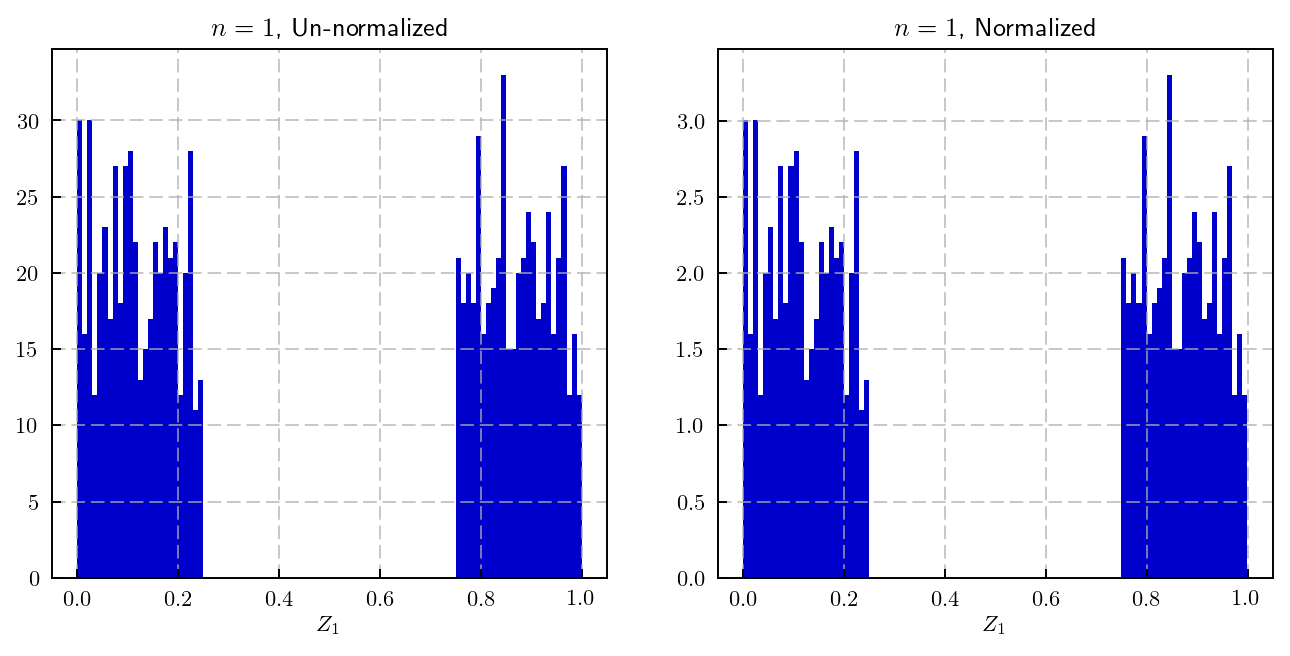

In [3]:
plot_pretty()
Z_1 = Z_n_random(1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (9.0,4.0))

ax[0].hist(Z_1, bins =100, color='mediumblue',normed=False)
ax[0].set_xlabel('$Z_1$')
ax[0].grid(ls='--', alpha=0.7)
ax[0].set_title('$n=1$, Un-normalized')
# ============================================================

ax[1].hist(Z_1, bins =100, color='mediumblue', normed=True)
ax[1].set_xlabel('$Z_1$')
ax[1].grid(ls='--', alpha=0.7)
ax[1].set_title('$n=1$, Normalized')

plt.show()

We see that in that case the distribution $y(x)$ is reproduced.

From now on I'll plot just the normalized histograms.

## $n$ = 2

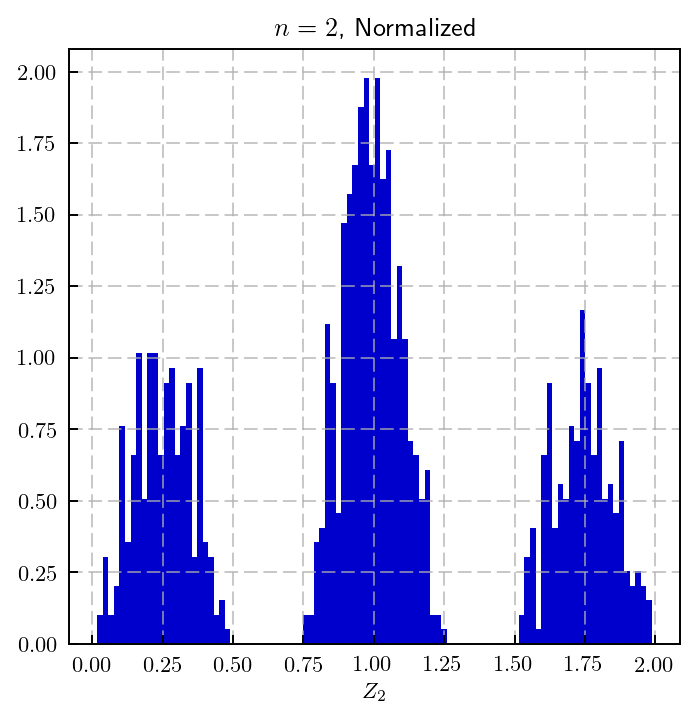

In [4]:
Z_2 = Z_n_random(2)
fig = plt.figure(figsize = (4.5,4.5))
plt.hist(Z_2, bins =100, color='mediumblue',normed=True)
plt.xlabel('$Z_2$')
plt.grid(ls='--', alpha=0.7)
plt.title('$n=2$, Normalized')
plt.show()

## $n$ = 3

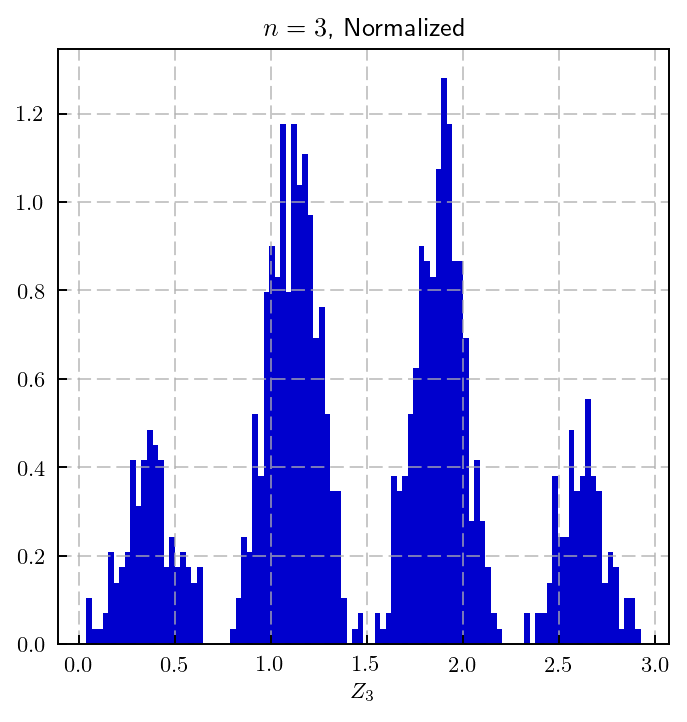

In [5]:
Z_3 = Z_n_random(3)
fig = plt.figure(figsize = (4.5,4.5))
plt.hist(Z_3, bins =100, color='mediumblue',normed=True)
plt.xlabel('$Z_3$')
plt.grid(ls='--', alpha=0.7)
plt.title('$n=3$, Normalized')
plt.show()

## $n$ = 5 

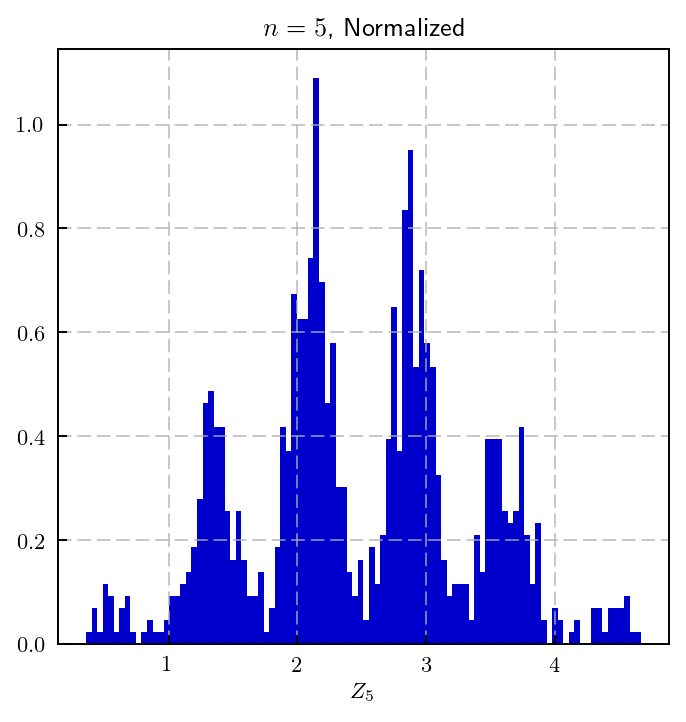

In [6]:
Z_5 = Z_n_random(5)
fig = plt.figure(figsize = (4.5,4.5))
plt.hist(Z_5, bins =100, color='mediumblue',normed=True)
plt.xlabel('$Z_5$')
plt.grid(ls='--', alpha=0.7)
plt.title('$n=5$, Normalized')
plt.show()

## $n$ = 10

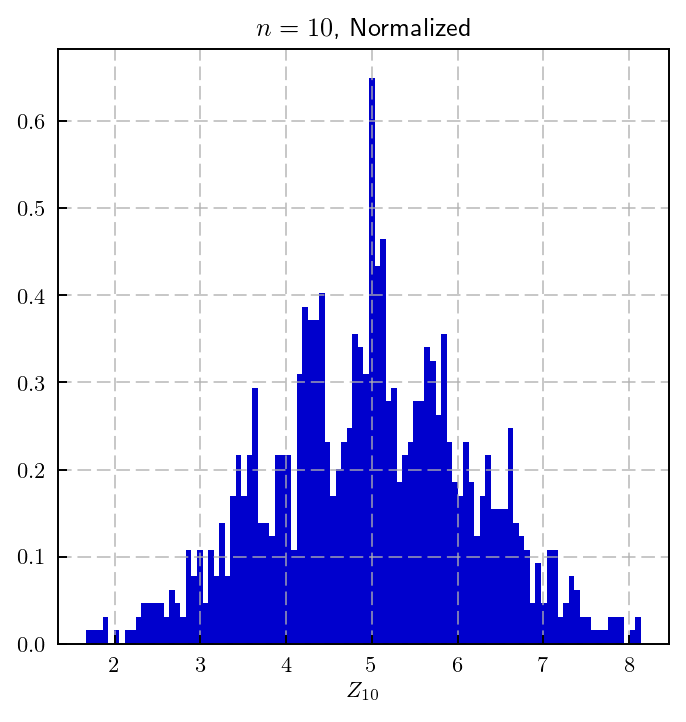

In [7]:
Z_10 = Z_n_random(10)
fig = plt.figure(figsize = (4.5,4.5))
plt.hist(Z_10, bins =100, color='mediumblue',normed=True)
plt.xlabel('$Z_{10}$')
plt.grid(ls='--', alpha=0.7)
plt.title('$n=10$, Normalized')
plt.show()

## $n$ = 20

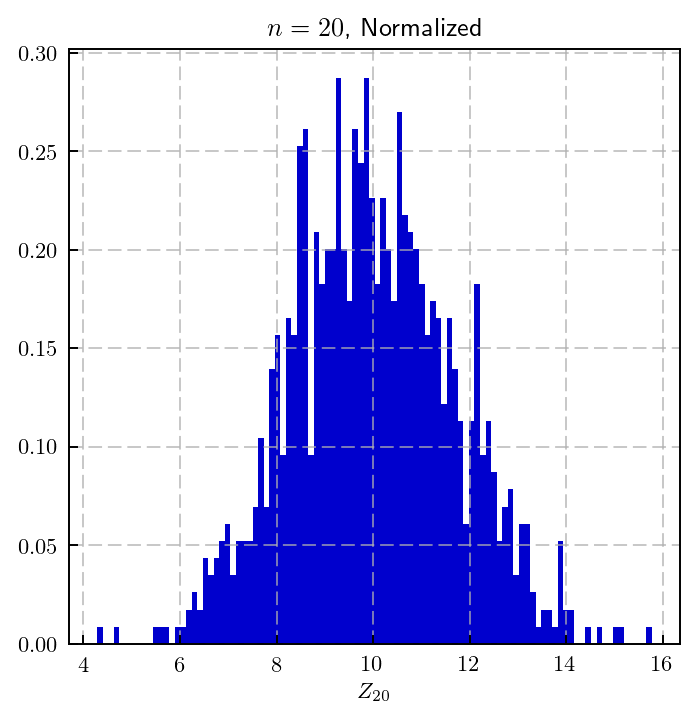

In [8]:
Z_20 = Z_n_random(20)
fig = plt.figure(figsize = (4.5,4.5))
plt.hist(Z_20, bins =100, color='mediumblue',normed=True)
plt.xlabel('$Z_{20}$')
plt.grid(ls='--', alpha=0.7)
plt.title('$n=20$, Normalized')
plt.show()

## $n$ = 50

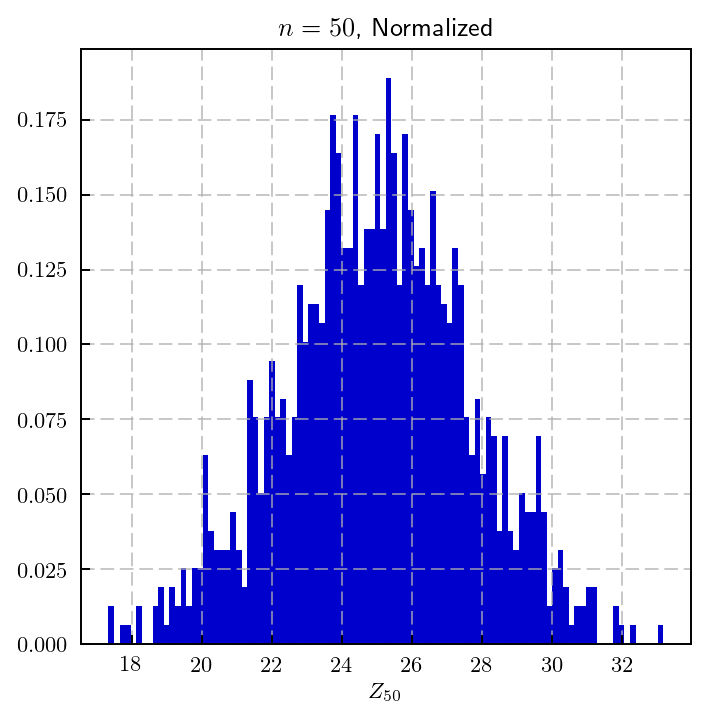

In [9]:
Z_50 = Z_n_random(50)
fig = plt.figure(figsize = (4.5,4.5))
plt.hist(Z_50, bins =100, color='mediumblue',normed=True)
plt.xlabel('$Z_{50}$')
plt.grid(ls='--', alpha=0.7)
plt.title('$n=50$, Normalized')
plt.show()

The above results display the validity of the Central Limit Theorem, that states that when independent random variables are added, their properly normalized sum tends towards a normal distribution.

# Problem 4

P.d.f: $g(x) \cong 1 - x$.

We fist have to normalize this (in the interval [0,1)). The value of the integral of $g$ in that range is

\begin{equation}
\int_{0}^{1} g(x) dx = 1/2
\end{equation}
so the normalized p.d.f is:

\begin{equation}
\boxed{
g(x) = 2(1 - x)}
\end{equation}

We want to generate $n=1000$ random numbers according to the above p.d.f. using:

- The inverse transform method
- The acceptance-rejection method

## 4.1 Inverse transform method

Let's start by applying the inverse transform method. The C.D.F of $g(x)$, $G(x)$ is:

\begin{equation}
G(x) = \int_0^x g(x') dx' = \int_0^x \, 2(1-x')dx' = 2\left(x - \frac{x^2}{2}\right) = 2x - x^2
\end{equation}

We have to invert this to find $x$. Let $G(x) = u$, then:

\begin{equation}
u = 2x - x^2 \Rightarrow x^2 - 2x - u = 0. 
\end{equation}

The discriminant of this polynomial is $\Delta = 4 - 4u = 4(1-u)$. Since $0 <= u <1$, this is positive and the equation has two roots:

\begin{equation}
x = \frac{2 \pm \sqrt{4(1-u)} }{2} = 1 \pm \sqrt{1-u} 
\end{equation}

Since $x$ is in the range $[0,1)$, we select the root:

\begin{equation}
\boxed{
x = 1 - \sqrt{1-u}}
\end{equation}

So, to generate random numbers $x_i$ according to the p.d.f $g(x)$, we draw random numbers $u_i$ from the uniform distribution $U(0,1)$ and then $x_i = 1 - \sqrt{1-u_i}$.

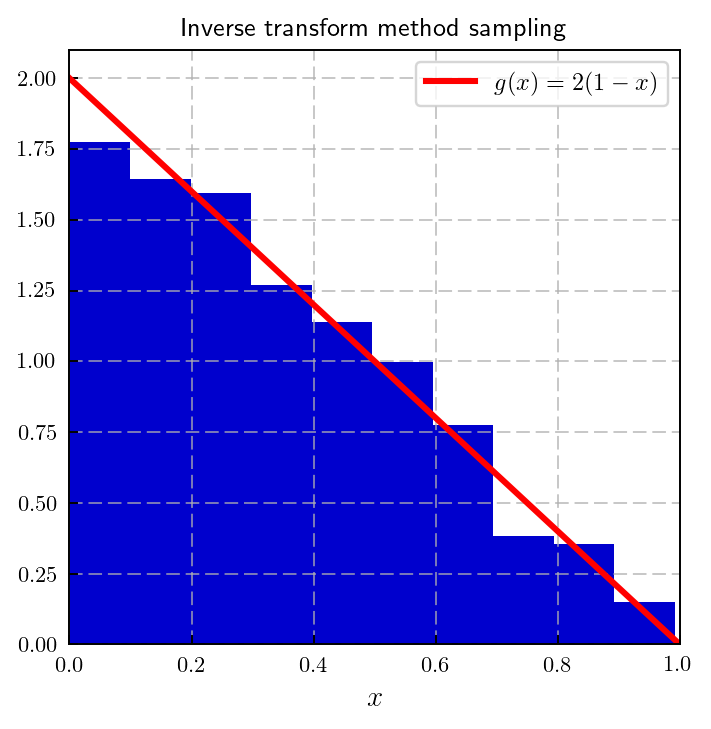

In [10]:
import time


t_start_1 = time.time()
u_i = rn.random(1000)
x_i = 1.0 - np.sqrt(1.0 - u_i)

t_fin_1 = time.time()

x_like = np.linspace(0.0,1.0,200)
y_like = 2.0*(1.0-x_like)

fig = plt.figure(figsize = (4.5,4.5))
plt.hist(x_i, bins =10, color='mediumblue',normed=True)
plt.plot(x_like, y_like, c='red', linewidth=2.5, label=r'$g(x)=2(1-x)$')
plt.grid(ls='--', alpha=0.7)
plt.xlabel('$x$', fontsize=12)
plt.title('Inverse transform method sampling')
plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.xlim(0.0,1.0)
plt.show()


## 4.2 Acceptance-rejection method

Here I'll use the acceptance-rejection method; this quite similar to what we did in problem 3.

Our normalized P.d.f is $g(x) = 2(1-x)$.

I also select the (un-normalized) distribution function $f(x) =2$ (defined in the range $x \in [0,1)$). The normalized form of it $\hat{f}(x) = U(0,1)$ (uniform distribution). 

I also define the function:

\begin{equation}
h(x) = \frac{g(x)}{f(x)} = 1 - x
\end{equation}

Then I'll draw a random variable $X$ from the distribution $\hat{f}$ and a random variable $Y$ from the uniform distribution $U(0,1)$. If $Y \leq h(X)$ I'm going to accept $x_i$. Otherwise it is rejected and I return to the previous step.

In [11]:
# This function returns exactly one random number x_i that follows g(x)
def x_i_rand():
    """
    This function uses the acceptance-rejection 
    method described above to produce *exactly one*
    random number x_i that according 
    to the distribution g(x)
    """
    x_random = 0.0
    k = 0
    while (k==0):
        X_trial = rn.random()
        Y_trial = rn.random() #It turns out that we don't need this
        h = 1.0 - X_trial
        if (Y_trial<=h):
            x_random = X_trial 
            k = 1
    return x_random

# ===============================================
# This function returns an array with n entries
# Each entry is a random number that follows the above
# Distribution

def randoms_g(n):
    """
    Returns array with n random numbers
    """
    #Initialize array
    rand_arr = np.zeros(n)
    
    for i in range(n):
        rand_arr[i] = x_i_rand()
    return rand_arr

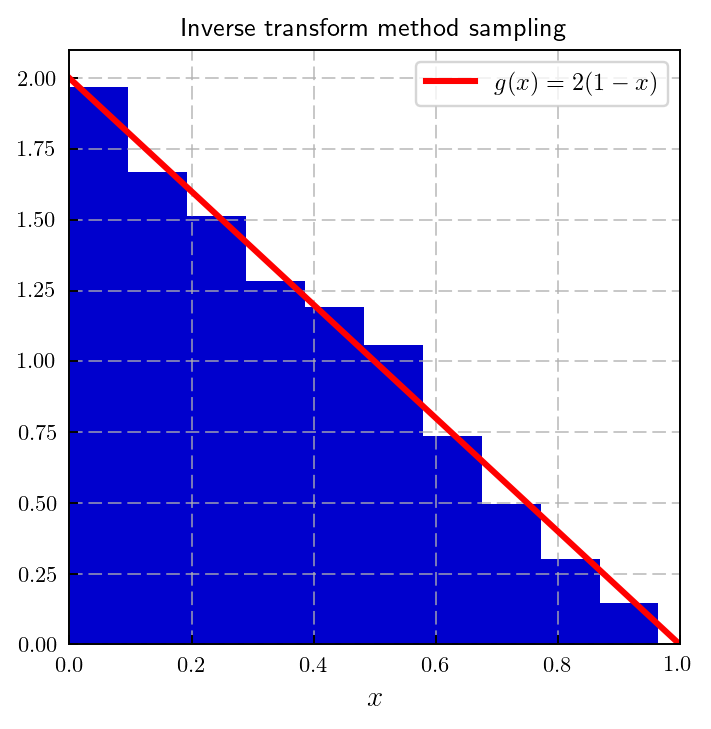

In [12]:
time_start_2 = time.time()

x_i_arr = randoms_g(1000)

time_fin_2 = time.time()


fig = plt.figure(figsize = (4.5,4.5))
plt.hist(x_i_arr, bins =10, color='mediumblue',normed=True)
plt.plot(x_like, y_like, c='red', linewidth=2.5, label=r'$g(x)=2(1-x)$')
plt.grid(ls='--', alpha=0.7)
plt.xlabel('$x$', fontsize=12)
plt.title('Inverse transform method sampling')
plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.xlim(0.0,1.0)
plt.show()

The generation time using the inverse transform method is (time in seconds):

In [14]:
print(t_fin_1 - t_start_1)

0.000502109527588


The generation time using the acceptance-rejection method is (time in seconds):

In [16]:
print(time_fin_2 - time_start_2)

0.00273013114929


We see that the generation time usign the acceptance-rejection method is much higher than that using the inverse transform method.

## Covariance Matrix

### Theory

Let $n_i$ and $n_j$ be the number of events in bins $i$ and $j$ of the histogram. $n_i$ and $n_j$ are NOT independent; the reason behind this is that the total number of events in the ten bins has to be constant and equal to $n= 1000$.

The number of events, $n_i$, should then follow a Multinomial distribution. 

Let's denote by $p_i$ the probability of an event to fall in a bin $i$. By definition ${\sum}_{i=1}^{10} p_i = 1$.

Then We can use the properties of the multinomial distribution; for the multinomial distribution:

-  The expected number of times the outcome $i$ was observed over $n$ trials is:

\begin{equation}
E(n_i) = np_i
\end{equation}

- The diagonal entries of the covariance matrix (variances) are:

\begin{equation}
\boxed{
\mbox{Var}(n_i) = np_i(1-p_i)}
\end{equation}

- The non-diagonal terms (covariances) are:

\begin{equation}
\boxed{
\mbox{Cov}(n_i,n_j) = -np_i\,p_j}, \quad i \neq j
\end{equation}

Let's now calculate $p_i$. Let $x_i, x_f$ the limits of the $i$-th bin. Then:

\begin{equation}
p_i = \int_{x_i}^{x_f}g(x)dx =2\int_{x_i}^{x_f}\left(1-x \right)dx = 2 \int_{x_i}^{x_f}\left(x - \frac{x^2}{2} \right)dx \Rightarrow
\end{equation}

\begin{equation}
\Rightarrow p_i = 2\left(x_f - x_i - \frac{x_f^2 - x_i^2}{2} \right) = \dots = (x_f - x_i)\left[2 -(x_i + x_f) \right]
\end{equation}

Now, in every case $x_f-x_i = 0.1$, so we can write it in an even simpler form:

\begin{equation}
p_i = 0.1\left[2 -(x_i + x_f) \right]
\end{equation}

Let's use the ab0ve formulae to calculate the theoretical expectation for the covariance matrix

In [17]:
# First calculate the probabilities
# Initialize 
p_i = np.zeros(10) 
x_i = np.linspace(0.0,1.0,11) # Limits of the bins

for i in range(10):
    x_in = x_i[i]
    x_fin = x_i[i+1]
    p_i[i] = 0.1*(2.0 - (x_in + x_fin))

# Now calculate the theory Covariance matrix

#Initialize the covariance matrix
Cov_th = np.zeros([10,10])

n = 1000.0 #Sample size

for i in range(10):
    for j in range(10):
        
        if (i==j):
            Cov_th[i,i] = n*p_i[i]*(1.0-p_i[i])
        else:
            Cov_th[i,j] = -n*p_i[i]*p_i[j]

#### Let's now plot the theory covariance matrix

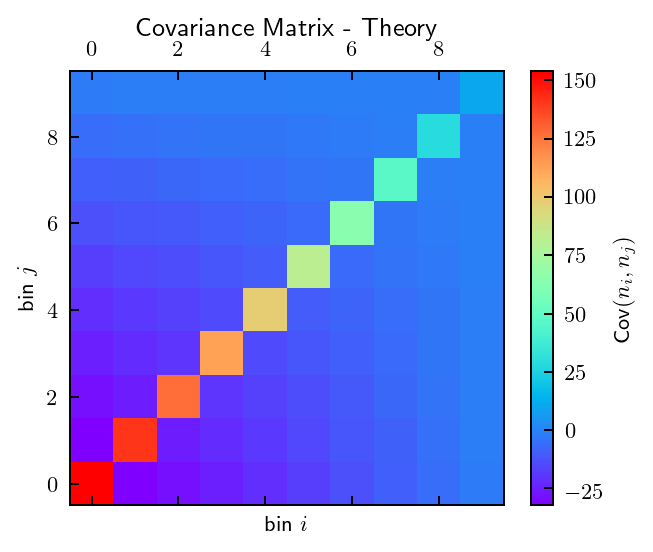

In [18]:
import matplotlib.axis as ax

plot_pretty() 
fig = plt.figure(figsize = (8,8))

plt.matshow(Cov_th, cmap=plt.cm.rainbow, origin='lower' )
ax.XAxis.tick_bottom
#plt.colorbar(shrink = 0.8)

cbar = plt.colorbar(shrink = 0.8)
cbar.set_label(r'$\mbox{Cov}(n_i,n_j)$')

plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)

plt.xlabel('bin $i$')
plt.ylabel('bin $j$')

plt.title('Covariance Matrix - Theory')

#plt.savefig('C_ells.pdf')
plt.show()

### Estimation

The sample covariance matrix can be estimated by (unbiased estimator):

\begin{equation}
\mbox{Cov}(n_i,n_j) = \frac{1}{N-1}\sum_{k=1}^N (n_i^k - \bar{n}_i)(n_j^k - \bar{n}_j)
\end{equation}

In our case we will perform $10^6$ simulations, so $N = 10^6$ in our case. I'll generate the events with the fastest inverse transform method.

The algorithm I'm going to use to calculate the covariance matrix goes as follows:

- Create an empty array $n_i[10,10^6]$. It has 10 rows (for the ten bins) and $10^6$ columns, for the $10^6$ realizations.
 
- Each time generate $1000$ random numbers according to the distribution $g(x)$. Split them into the ten bins. Populate the columns of the $n_i$ array. 

- After that, calculate the mean values of $n_i$ and the Covariance matrix according to the above formula. Notice that the covariance matrix is symmetric $\mbox{Cov}(n_i,n_j) = \mbox{Cov}(n_j,n_i)$. This can save some time from the calculations.


In [19]:
N_real = 10**6 #Number of realizations
n_i_realizations = np.zeros([10,N_real]) #Initialize n_i array

# Populate the n_i array for 10^6 
for i in range(N_real): 
    # Create x_i random numbers
    u_i = rn.random(1000)
    x_i = 1.0 - np.sqrt(1.0 - u_i)
    
    n_i_realizations[:,i] = np.histogram(x_i, bins=10, normed=False)[0]

# ===========================================================

In [20]:
# Now calculate the covariance matrix
# ===========================================================
# ===========================================================
# First calculate the mean values of n_i 
n_i_mean = np.zeros(10)
for i in range(10):
    n_i_mean[i] = np.mean(n_i_realizations[i,:])
    
# Now we can calculate the covariance matrix
# We can use the np.cov function of python, but here
# I prefer to write my own function 

# Initialize covariance matrix 
Cov = np.zeros([10,10])

#Populate the covariance matrix
for i in range(10):
    for j in range(10):
        Cov[i,j] = np.sum((n_i_realizations[i,:]-n_i_mean[i])*(n_i_realizations[j,:]-n_i_mean[j]))
        
Cov = Cov/(N_real - 1.0)

#### Let's now plot the estimated covariance matrix

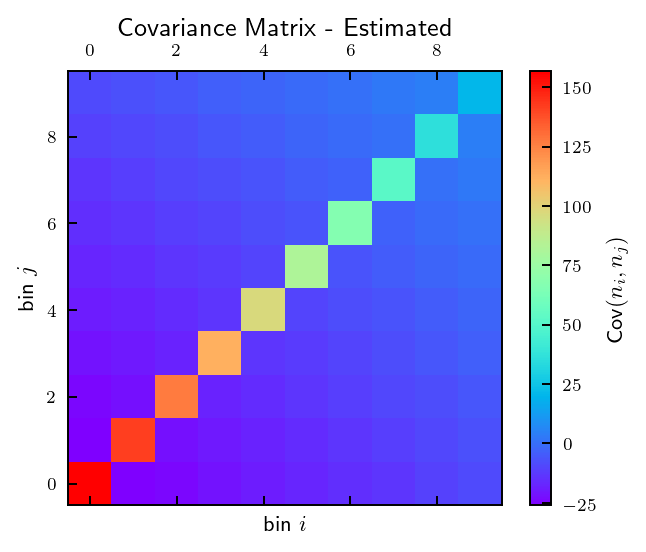

In [21]:
import matplotlib.axis as ax

plot_pretty() 
fig = plt.figure(figsize = (8,8))

plt.matshow(Cov, cmap=plt.cm.rainbow, origin='lower' )
ax.XAxis.tick_bottom
#plt.colorbar(shrink = 0.8)

cbar = plt.colorbar(shrink = 0.8)
cbar.set_label(r'$\mbox{Cov}(n_i,n_j)$')

plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)

plt.xlabel('bin $i$')
plt.ylabel('bin $j$')

plt.title('Covariance Matrix - Estimated')

#plt.savefig('C_ells.pdf')
plt.show()

### Comparison

By visually comparing the theoretical expectation and the estimation  from the similations for the covariance matrix, we can see that the two results agree. 

But to be more precise, let's compare the numerical values of the entries of the covariance matrices. 

For that reason, let's plot $i$, $j$, $\mbox{Cov}(n_i,n_j)$ (estimated), $\mbox{Cov}(n_i,n_j)$(theory)

In [22]:
print('i,   j,      V(i,j)[estimated],           V(i,j)[theory]')

for i in range(10):
    for j in range(10):
        print i+1,',',j+1,',      ',Cov[i,j],',            ',Cov_th[i,j]  


i,   j,      V(i,j)[estimated],           V(i,j)[theory]
1 , 1 ,       156.744474873 ,             153.9
1 , 2 ,       -26.0850378603 ,             -32.3
1 , 3 ,       -23.9906127871 ,             -28.5
1 , 4 ,       -21.5106172544 ,             -24.7
1 , 5 ,       -19.4594203218 ,             -20.9
1 , 6 ,       -17.3775606208 ,             -17.1
1 , 7 ,       -15.2192020711 ,             -13.3
1 , 8 ,       -13.2673126777 ,             -9.5
1 , 9 ,       -10.9575766904 ,             -5.7
1 , 10 ,       -8.87713458968 ,             -1.9
2 , 1 ,       -26.0850378603 ,             -32.3
2 , 2 ,       142.068582965 ,             141.1
2 , 3 ,       -21.8655606426 ,             -25.5
2 , 4 ,       -19.7834732583 ,             -22.1
2 , 5 ,       -17.5451348121 ,             -18.7
2 , 6 ,       -15.5250479652 ,             -15.3
2 , 7 ,       -13.3521569297 ,             -11.9
2 , 8 ,       -11.3607160474 ,             -8.5
2 , 9 ,       -9.33080891557 ,             -5.1
2 , 10 ,       -7.

We can see that although for some entries the agreement between the estimated and the theory expectation is very good, for other entries there is some significan difference. The best agreement is for the cross correlation between lower bins (like (1,2), (1,3) etc) while the worst between correlations of higher bins (like (10,9))

# Problem 5

$x$ and $y$ are standard normal random variables, $N(0,1)$. We define a new random variable $U = x/y$.

- First I'll determine the p.d.f. of U by performing a simulation (I'll generate pairs of standard normal random numbers and make a histogram of their ratio)

In [23]:
mu = 0.0
sigma = 1.0
# Let's generate 10^6 events
N_even = 10**8

x = rn.normal(mu, sigma, N_even)
y = rn.normal(mu, sigma, N_even)

U = x/y
U = U[(U<50)&(U>-50)]

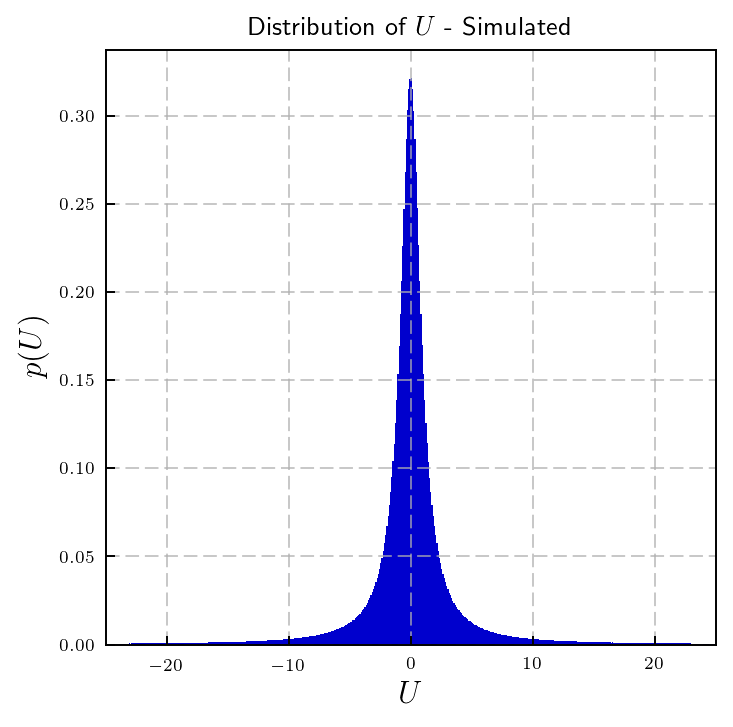

In [24]:
fig = plt.figure(figsize = (4.5,4.5))
plt.hist(U, bins =1000, color='mediumblue',normed=True)
plt.xlabel('$U$', fontsize=13)
plt.ylabel('$p(U)$', fontsize=13)
plt.grid(ls='--', alpha=0.7)
plt.title('Distribution of  $U$ - Simulated')
plt.xlim(-25,25)
plt.show()

Note that I disregard events that have $U>50$ or $U<-50$, otherwise the number of bins is spead out in a huge and un-natural range of $U$s.

- Now I'll try to calcluate analytically the p.d.f for $U$ by performing a change of variables.

The variables $x$ and $y$ are both normally distributed:

\begin{equation}
p(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}, \quad p(y) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}y^2}
\end{equation}

The new variable $U$ is defined as $U = x/y$. Because to perform a change of variables we need to go from $2 \to 2$ random variables, we also consider the auxillary new random variable $V = y$; I'll find the joint p.d.f for $U, V$ and I'll marginalize over $V$ to find $p(U)$.


So:
\begin{eqnarray}
U = x/y  \Rightarrow x = Uy \Rightarrow x = UV \\
V = y \Rightarrow y = V
\end{eqnarray}

The joint distribution for the new variables will be:

\begin{equation}
p(U,V) = P(x,y)\left|\frac{\partial(x,y)}{\partial(U,V)} \right|
\end{equation}

The partial derivatives can easily calculated to be:

\begin{equation}
\frac{\partial x}{\partial U} = V, \quad \frac{\partial x}{\partial V} = U
\end{equation}

\begin{equation}
\frac{\partial y}{\partial U} = 0, \quad \frac{\partial y}{\partial V} = 1
\end{equation}

So, the Jacobian is : $J = \left|\frac{\partial(x,y)}{\partial(U,V)} \right| = \left| V \right|$.

Then: $p(U,V) = p(x)p(y)J = p(UV)p(V)\left| V \right|$. 

Or:

\begin{equation}
p(U,V) = \frac{1}{2\pi} e^{-\frac{1}{2}(UV)^2}e^{-\frac{1}{2}V^2}\left| V \right|
\end{equation}

Then, we can marginalize (integrate) over $V$ to find $p(U)$:

\begin{equation}
p(U) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} e^{-\frac{1}{2}(UV)^2}e^{-\frac{1}{2}V^2}\left| V \right| dV = \frac{1}{\pi}  \int_{0}^{+\infty} e^{-\frac{1}{2}(UV)^2}e^{-\frac{1}{2}V^2} dV  \Rightarrow
\end{equation}

\begin{equation}
p(U) = \frac{1}{\pi}  \int_{0}^{+\infty} e^{-\frac{1}{2}(U+1)^2V^2 } V dV
\end{equation}

Now, setting $w = \frac{1}{2}(U+1)^2V^2$, we have $dw = (U+1)^2 V dV \Rightarrow V dV = dw/(U+1)^2$. So, the integral becomes:

\begin{equation}
p(U) = \frac{1}{\pi(1+U)^2}\int_{0}^{+\infty} e^{- w}dw  \Rightarrow \boxed{p(U) =  \frac{1}{\pi(1+U)^2}}
\end{equation}

Let's plot the above theoretical form for the $p(U)$.

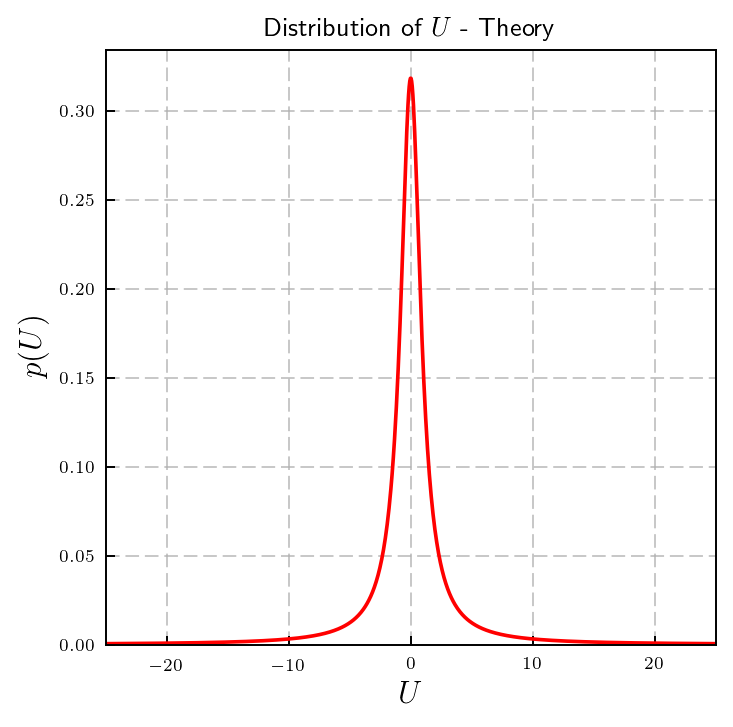

In [25]:
u = np.linspace(-25,25,1000)

p_u = 1.0/(np.pi*(u**2.0+1))

fig = plt.figure(figsize = (4.5,4.5))
plt.plot(u, p_u, c='red')
plt.xlabel('$U$', fontsize=13)
plt.ylabel('$p(U)$', fontsize=13)
plt.grid(ls='--', alpha=0.7)
plt.title('Distribution of  $U$ - Theory')
plt.xlim(-25,25);plt.ylim(0,)
plt.show()

Let's overplot the simulated and theoretical forms for $U$.

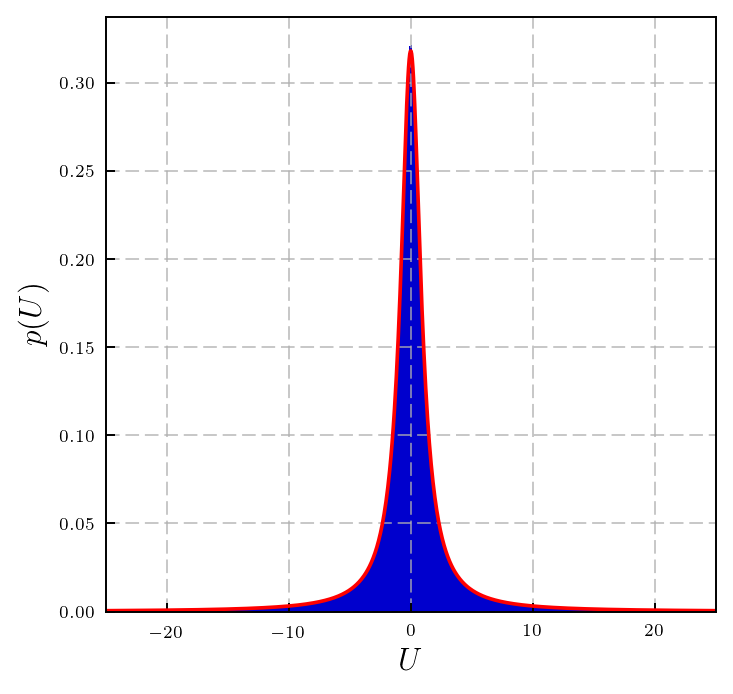

In [26]:
fig = plt.figure(figsize = (4.5,4.5))
plt.plot(u, p_u, c='red')
plt.hist(U, bins =1000, color='mediumblue',normed=True)
plt.xlabel('$U$', fontsize=13)
plt.ylabel('$p(U)$', fontsize=13)
plt.grid(ls='--', alpha=0.7)
plt.xlim(-25,25);plt.ylim(0,)
plt.show()

The agreement is excellent!